In [17]:
library('igraph')
library('pracma')
library('Matrix')

In [18]:
setwd("C:/Users/eshal/Documents/Schoolwork/University of California, Los Angeles/Electrical Engineering/EE232E (S2018)/Projects/Project 2 Social Network Mining/gplus")
temp = list.files(pattern="*.circles")

In [19]:
#Problem 18
counter<-0
for (i in temp){
    l<-length(readLines(i))
    if (l>=2)
        counter<-counter +1
}
counter

[1] 125

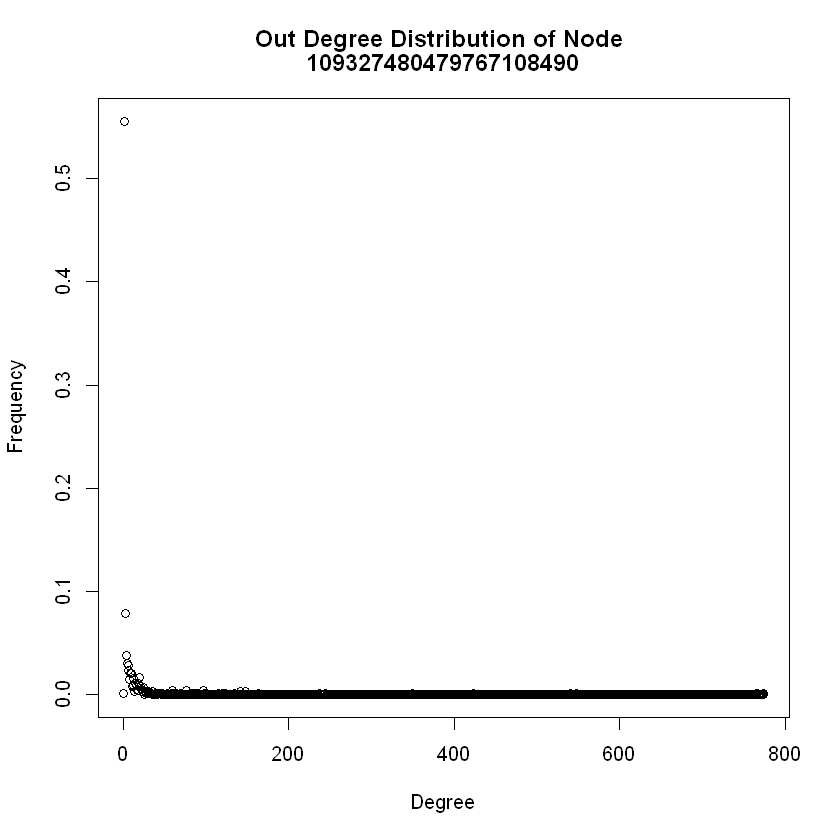

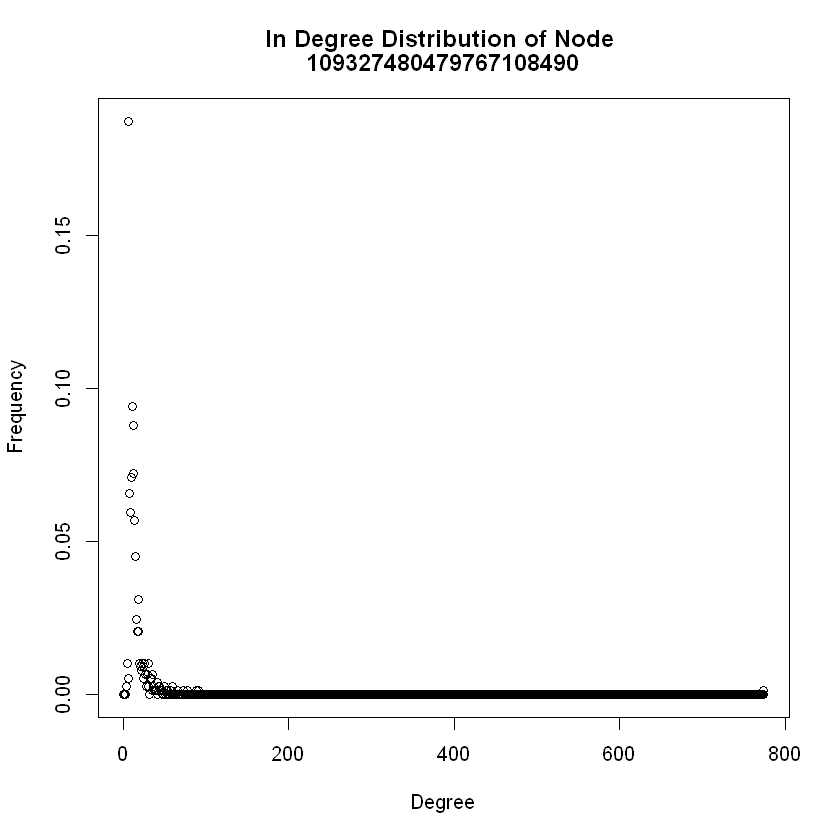

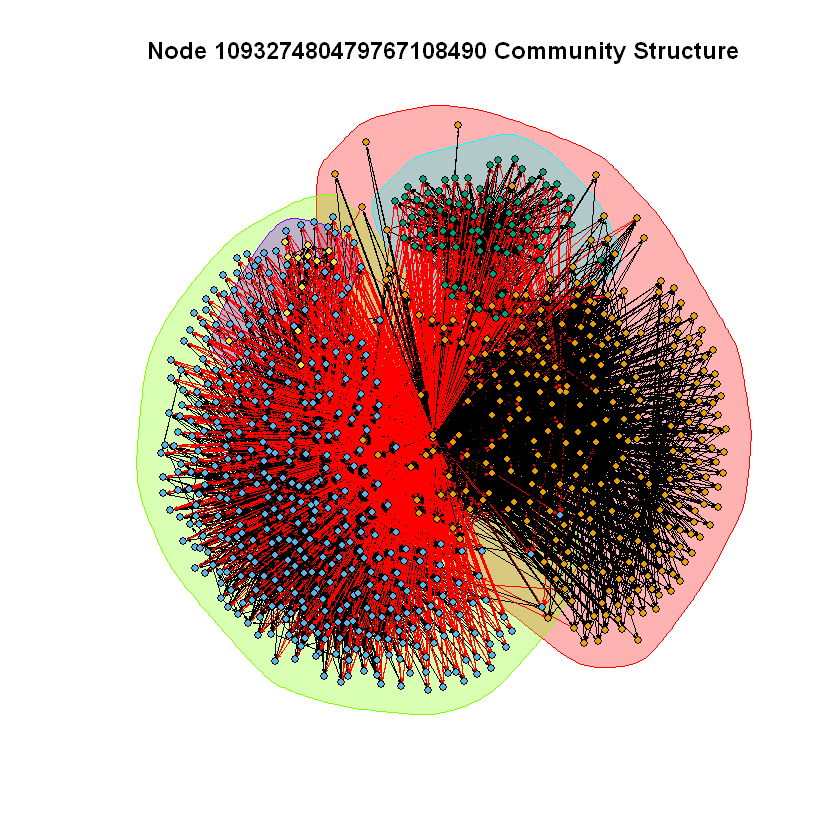

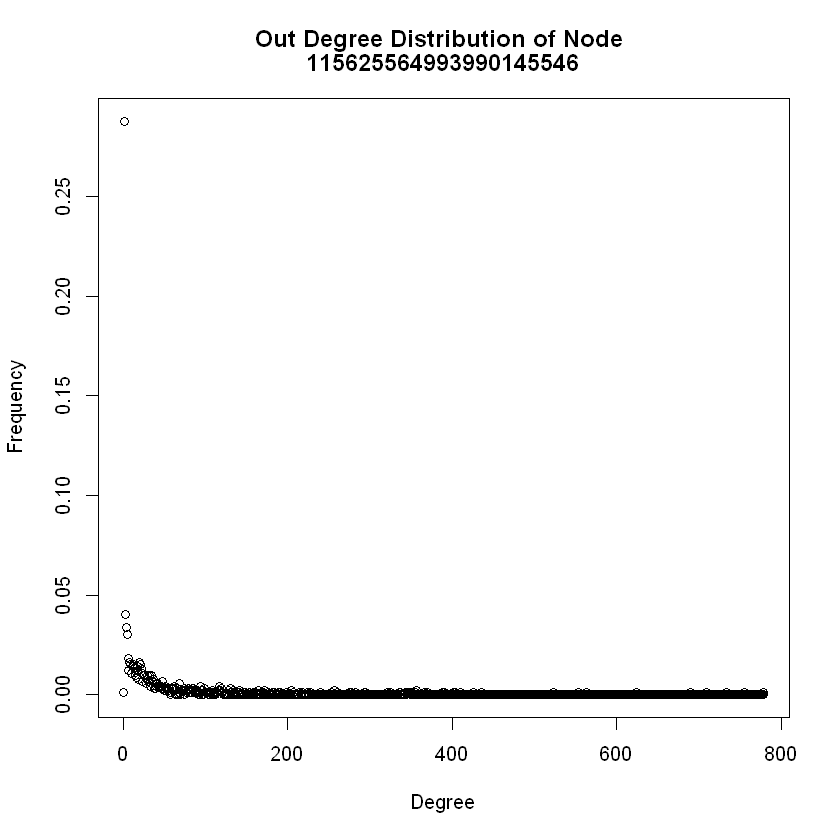

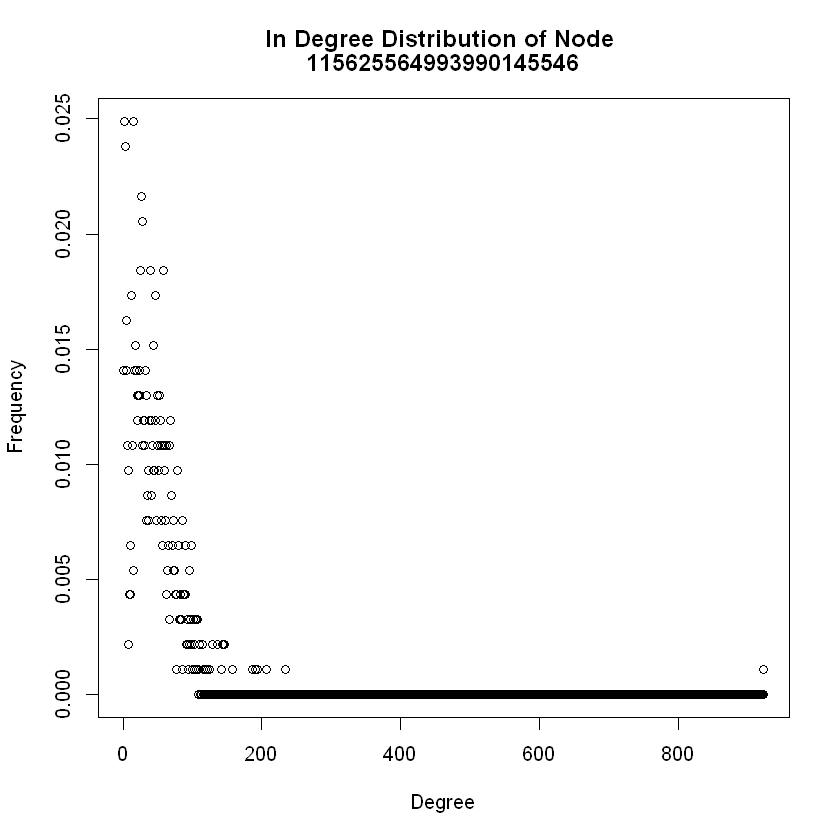

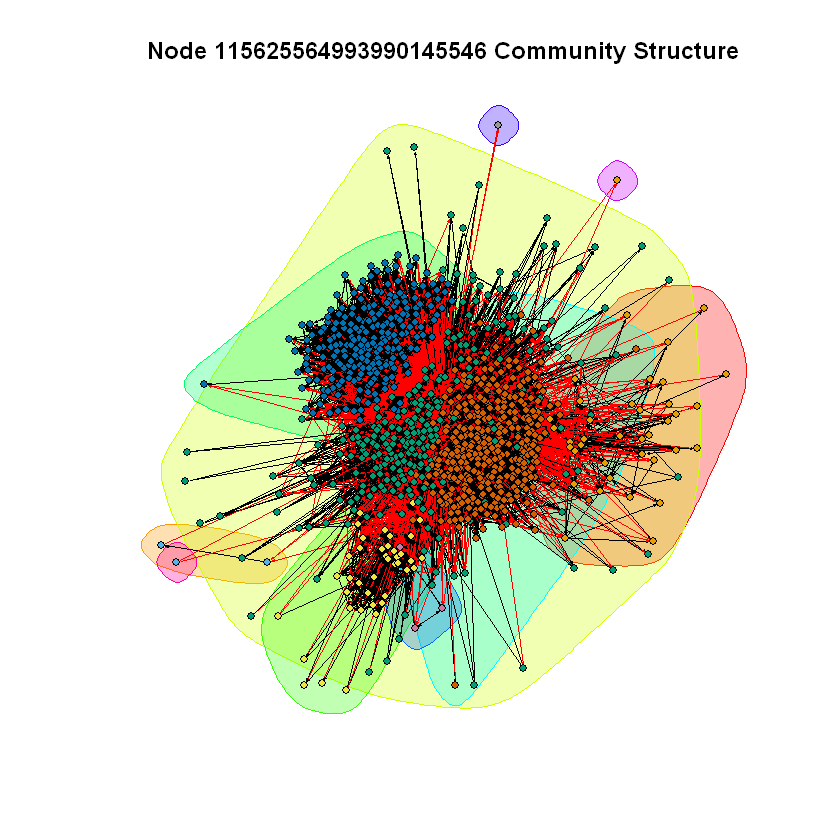

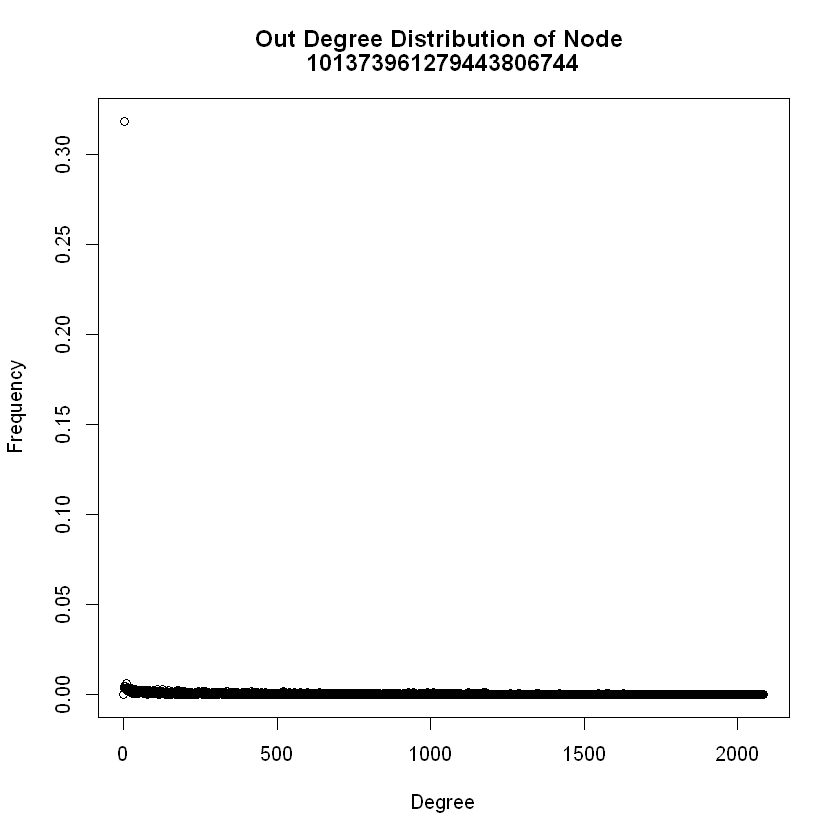

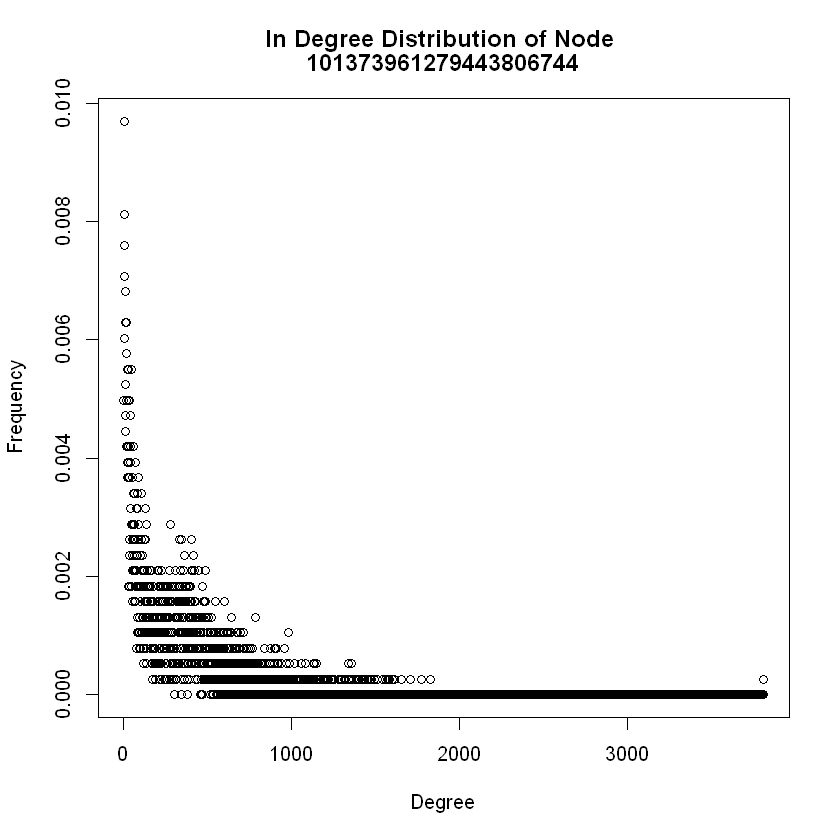

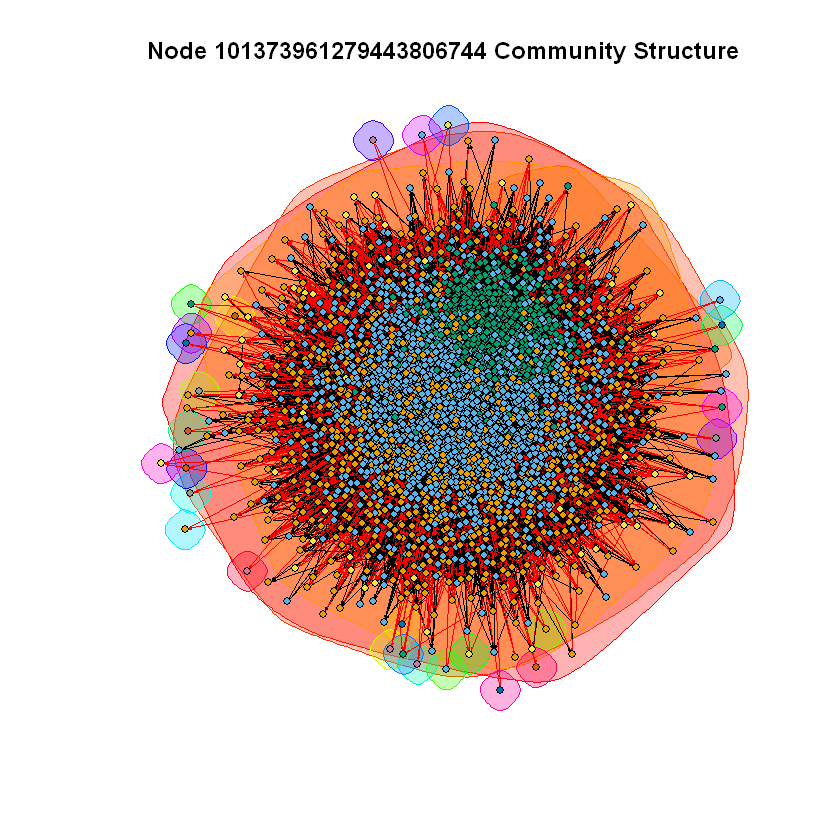

In [23]:
ego_nodes=c("109327480479767108490","115625564993990145546","101373961279443806744")
mods=numeric(3)
for (name in ego_nodes){
    edges<-paste(name,".edges",sep="")
    g<-read.graph(edges,directed=TRUE,format="ncol",names=TRUE)
    g<-add_vertices(g,nv=1,name=name)
    id=which(V(g)$name==name)
    for (i in 1:(vcount(g)-1)){
        g<-add_edges(g,c(i,id))
    }
    plot(degree_distribution(g,mode="out"),main=c("Out Degree Distribution of Node ",name),xlab="Degree",ylab="Frequency")
    dev.copy(png, paste("out_",name,".png",sep=""))
    dev.off()
    plot(degree_distribution(g,mode="in"),main=c("In Degree Distribution of Node ",name),xlab="Degree",ylab="Frequency")
    dev.copy(png, paste("in_",name,".png",sep=""))
    dev.off()

    wt<-cluster_walktrap(g)
    plot(wt,g,vertex.size=3,vertex.label=NA,edge.arrow.size=0.1,main=paste("Node",name,"Community Structure",sep=" "))
    dev.copy(png, paste("wt_",name,".png",sep=""))
    dev.off()
    mods[which(ego_nodes==name)]=modularity(wt)
}

In [24]:
mods

[1] 0.2527654 0.3194726 0.1910903